In [41]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap


# Load the dataset
df=pd.read_csv('C:/Users/alfai/Downloads/Iris.csv')

# Display few rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# Normalize the features
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)
X = df.drop('Species', axis=1) 
y = df['Species']     
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [28]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [30]:
# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
# Predict on test data
y_pred = knn.predict(X_test)

In [35]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [37]:
# Accuracy vs. K Plot
accuracy_scores = []

# Try k from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, preds))


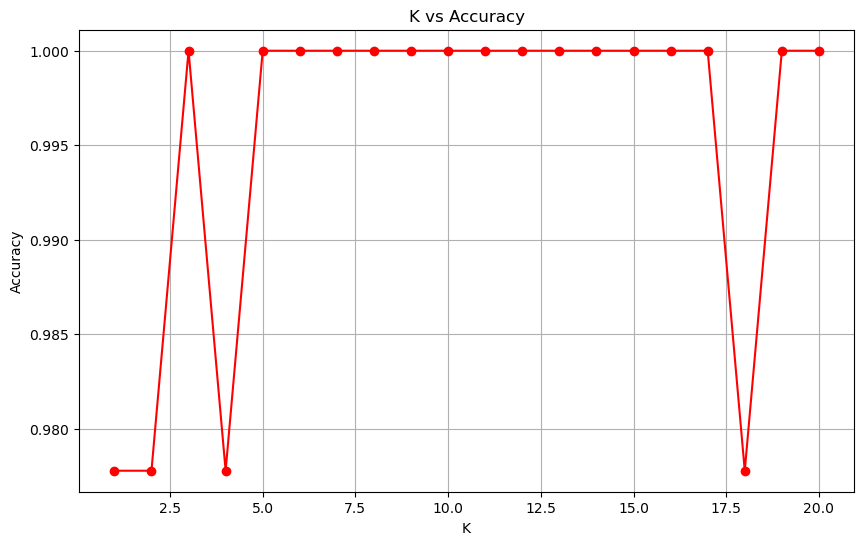

In [40]:
# Plot results
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), accuracy_scores, marker='o', color='red')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [48]:
# Visualize Decision Boundaries

from sklearn.preprocessing import LabelEncoder
# Convert class labels to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Use only the first two features for visualization
X_2d = X_scaled[:, :2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2d, y_encoded, test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train2, y_train2)


KNeighborsClassifier(n_neighbors=3)

In [49]:
# Create mesh grid
h = 0.02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

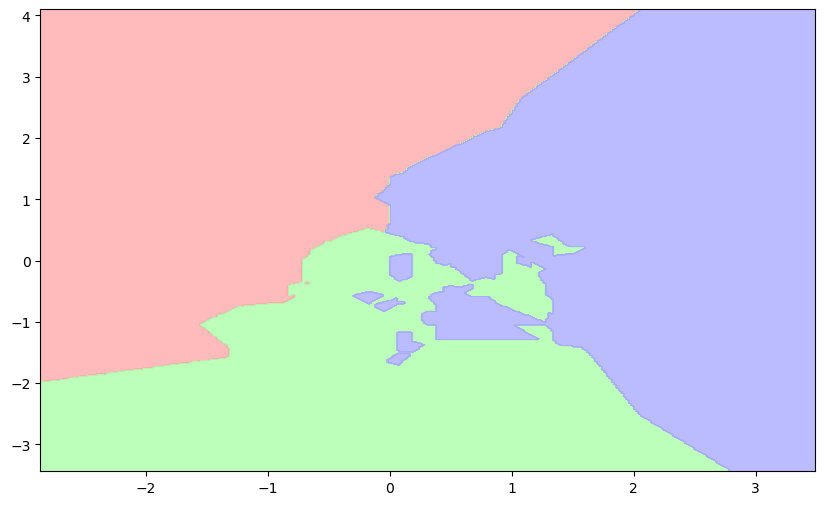

In [51]:
# Predict across meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.8)


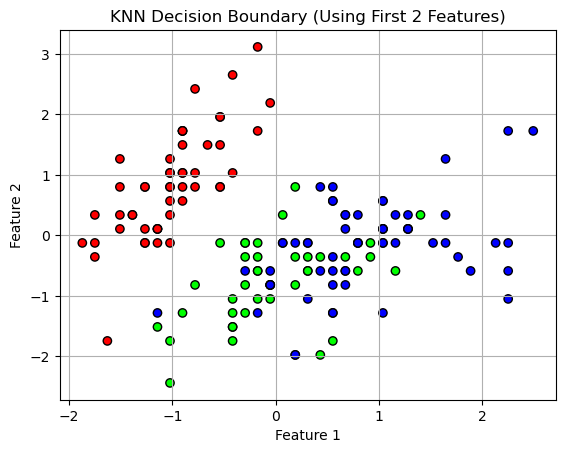

In [52]:
# Plot data points
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_encoded, edgecolor='k',
            cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.title("KNN Decision Boundary (Using First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()